[ 0.5162197   0.85008454 -0.84062853  0.22743278 -0.64950787  0.62124064
  0.16952897 -0.63048262  0.5023563   0.11255756  0.21489179  0.75205234
  0.79228717 -0.10011854  0.58034048  0.69358605 -0.17889038 -0.70375026
  0.28753492  0.19210233 -0.32000178 -0.94158596  0.96003431  0.53915652
  0.48166127 -0.42127254 -0.85934723 -0.46633182  0.22567214  0.61342708
  0.01031131  0.44953152 -0.6660651   0.75833655 -0.66585625  0.15844014
  0.2622595   0.94906406  0.90150229  0.03921702  0.52635446 -0.35082096
  0.19352372 -0.58755885  0.52789123 -0.16527322  0.63063677 -0.40960217
  0.75996463 -0.99660856]


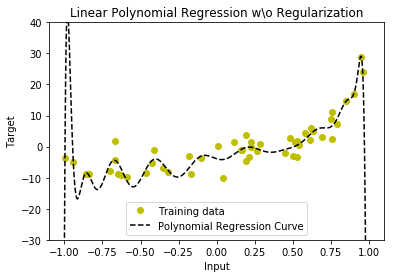

MSE of training 6.47679853116
MSE of validation 1419.91389547


In [6]:
#A1.1.1
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(threshold='nan')

#training data
data = np.genfromtxt( "Datasets\Dataset_1_train.csv",names=['x','y'], delimiter=",")
x1=data['x']
y=data['y']

#validation data
data_val = np.genfromtxt( "Datasets\Dataset_1_valid.csv",names=['x_val','y_val'], delimiter=",")  
x1_val=data_val['x_val']
y_val=data_val['y_val'] 

#create matrixe with polynomial fct as cols and # of examples as rows
def crt_poly_mat(x1,high_exp):
    x0=np.ones(50)
    x=np.column_stack((x0,x1))
    for i in range(2,high_exp+1):
        x_temp=x1**i
        x=np.column_stack((x,x_temp))
    return x

#create the poly matrices        
x_val=crt_poly_mat(x1_val,20)      
x=crt_poly_mat(x1,20)

xtx=x.T.dot(x) 
xtx_inv=np.linalg.inv(xtx)
w_star=xtx_inv.dot(x.T.dot(y))

#this makes the predicction of Y given using a 20 degrees polynomial model
def y_pred(t,w_star):
    return w_star[0]*t**0+w_star[1]*t**1+w_star[2]*t**2+w_star[3]*t**3+w_star[4]*t**4+w_star[5]*t**5+w_star[6]*t**6+w_star[7]*t**7+w_star[8]*t**8+w_star[9]*t**9+w_star[10]*t**10+w_star[11]*t**11+w_star[12]*t**12+w_star[13]*t**13+w_star[14]*t**14+w_star[15]*t**15+w_star[16]*t**16+w_star[17]*t**17+w_star[18]*t**18+w_star[19]*t**19+w_star[20]*t**20

print x1

#plot the datapoints and the linear polynomial regression with minimal MSE
t1 = np.arange(-1, 1, 0.000001)
plt.plot(x1,y, 'yo', t1, y_pred(t1,w_star), '--k')
plt.ylim(-30,40)
plt.ylabel('Target')
plt.xlabel('Input')
plt.title('Linear Polynomial Regression w\o Regularization')
plt.legend(['Training data','Polynomial Regression Curve'])
#plt.savefig('plots/plot1.1.png')
plt.show()

#compute the MSE of a prediction on a given dataset
def MSE(x,y,w_star):
    return (y-x.dot(w_star)).T.dot((y-x.dot(w_star)))/x.shape[0]


MSE_tr=MSE(x,y,w_star)
print "MSE of training", MSE_tr
MSE_val=MSE(x_val,y_val,w_star)
print "MSE of validation", MSE_val
